### 0. 환경구축

In [1]:
# 관련 라이브러리 설치
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

In [2]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
!pip install python-dotenv

In [5]:
import os
from dotenv import load_dotenv

In [6]:
load_dotenv()

True

In [50]:
token = os.getenv('HUGGINGFACE_TOKEN')

### 1. 학습데이터 로딩

#### 허깅페이스에서 데이터셋 다운

In [7]:
from datasets import load_dataset

In [8]:
ds = load_dataset('lewtun/dog_food')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

(…)-00000-of-00001-e911c635bb007d15.parquet:   0%|          | 0.00/217M [00:00<?, ?B/s]

(…)-00000-of-00001-72eb355cf5eb6762.parquet:   0%|          | 0.00/67.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/750 [00:00<?, ? examples/s]

In [9]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2250
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 750
    })
})

In [10]:
ds['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 2250
})

In [11]:
ds['test'][100]['label']

0

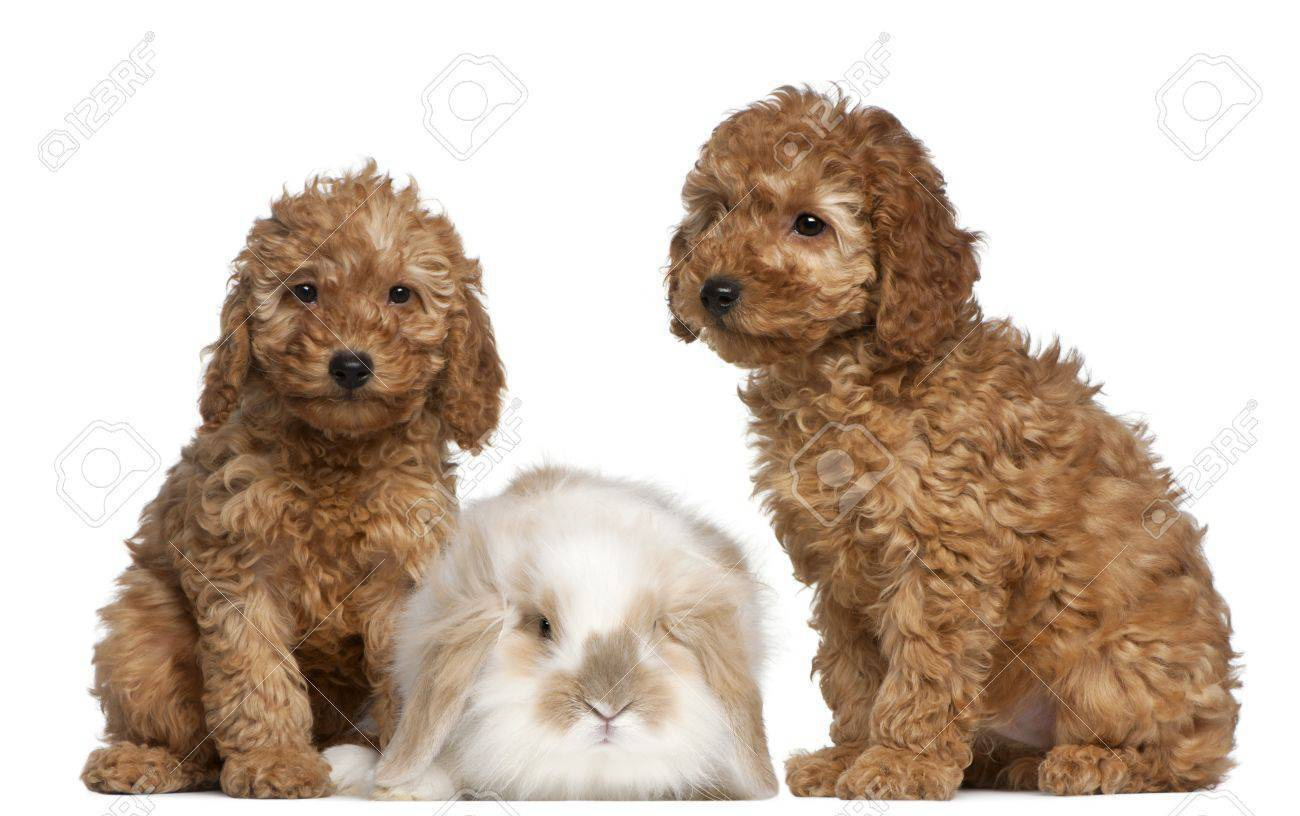

In [14]:
ds['train'][1000]['image']

### 2. 이미지 전처리


In [17]:
from transformers import ViTFeatureExtractor

In [19]:
model_name = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

#### 많은 데이터를 모아서 전처리되는 사용자 정의 함수 구현

In [21]:
def transform(example_batch) :
  inputs = feature_extractor(example_batch['image'], return_tensors='pt')
  inputs['label'] = example_batch['label']

  return inputs

#### 전체 데이터에 전처리 함수 적용

In [22]:
prepared_ds = ds.with_transform(transform)

In [23]:
prepared_ds['test'][5]

{'pixel_values': tensor([[[-0.0588, -0.0588, -0.0431,  ...,  0.2863,  0.2706,  0.2706],
          [-0.0588, -0.0588, -0.0431,  ...,  0.3020,  0.2863,  0.2863],
          [-0.0588, -0.0510, -0.0353,  ...,  0.3333,  0.3176,  0.3176],
          ...,
          [-0.1059, -0.0902, -0.0745,  ...,  0.0353, -0.0118, -0.0196],
          [-0.1059, -0.1059, -0.0902,  ...,  0.0275, -0.0196, -0.0275],
          [-0.0980, -0.0980, -0.0824,  ...,  0.0196, -0.0118, -0.0196]],
 
         [[ 0.0039,  0.0039,  0.0196,  ...,  0.3961,  0.3804,  0.3804],
          [ 0.0039,  0.0039,  0.0196,  ...,  0.4118,  0.3961,  0.3961],
          [ 0.0039,  0.0118,  0.0275,  ...,  0.4353,  0.4275,  0.4275],
          ...,
          [-0.1843, -0.1686, -0.1529,  ..., -0.0902, -0.1059, -0.1059],
          [-0.1843, -0.1843, -0.1686,  ..., -0.0980, -0.1137, -0.1137],
          [-0.1765, -0.1765, -0.1608,  ..., -0.1059, -0.1059, -0.1059]],
 
         [[ 0.0275,  0.0275,  0.0431,  ...,  0.4745,  0.4667,  0.4667],
          [ 

### 3. 학습 및 검증

#### 사전학습 및 모델 다운로드

In [24]:
from transformers import ViTForImageClassification

In [25]:
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels = 3
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### 학습 파라미터 클래스 생성

In [26]:
from transformers import TrainingArguments

In [32]:
batch_size = 64

# 학습파라미터 클래스 생성
args = TrainingArguments(
    learning_rate=2e-5, # 학습률
    per_device_train_batch_size = batch_size, # 훈련시 배치사이즈 설정
    per_device_eval_batch_size = batch_size, # 검증시 배치사이즈 설정
    num_train_epochs = 5, # 학습 횟수 설정
    output_dir = "./dog_food", # 학습결과가 저장될 경로(모델 체크포인트 같은 역할)
    run_name = "dog_food",
    save_strategy="epoch", # 매번 에포크 마다 파일 저장
    load_best_model_at_end = True, # 학습 종료시 베스트모델 로딩
    greater_is_better=True, # 베스트 모델 저장
    eval_strategy = "epoch", # 매번 에포크 마다 검증결과 출력
    remove_unused_columns=False
)

#### 학습을 시켜주는 클래스

In [33]:
from transformers import Trainer

#### 데이터를 넣어주는 함수

In [35]:
import torch

def collate_fn(batch) :
  return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
  }

#### 학습 트레이너 클래스 생성


In [37]:
trainer = Trainer(
    model = model, # 파인튜닝할 모델
    args = args, # 학습방법 클래스(설정값)
    train_dataset = prepared_ds['train'], # 훈련용 데이터 연결
    eval_dataset = prepared_ds['test'], # 검증용 데이터 연결
    processing_class = feature_extractor, # 전처리 도구
    data_collator = collate_fn
)

#### 학습 실시

In [38]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.034606
2,No log,0.029482
3,No log,0.026614
4,No log,0.026405
5,No log,0.026303


TrainOutput(global_step=180, training_loss=0.02666080527835422, metrics={'train_runtime': 593.2131, 'train_samples_per_second': 18.965, 'train_steps_per_second': 0.303, 'total_flos': 8.7179269669632e+17, 'train_loss': 0.02666080527835422, 'epoch': 5.0})

In [39]:
trainer.evaluate()

{'eval_loss': 0.0346057154238224,
 'eval_runtime': 17.3433,
 'eval_samples_per_second': 43.244,
 'eval_steps_per_second': 0.692,
 'epoch': 5.0}

#### 정확도로 평가지표 확인

In [40]:
# 예측 값 추출
pre = trainer.predict(prepared_ds['test'])

In [41]:
pre.predictions

array([[-1.3773383, -1.4389693,  2.8086078],
       [ 2.934637 , -1.268063 , -1.4943256],
       [-1.3981191,  2.6749535, -1.3007457],
       ...,
       [-1.527828 , -1.2497138,  2.8561678],
       [-1.3867196,  2.6483908, -1.4586556],
       [-1.4209948,  2.6505833, -1.3728247]], dtype=float32)

#### 모델의 예측 값(확률을 클래스 번호로 변경한 결과)

In [42]:
pre.predictions.argmax(axis=1)

array([2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1,

#### 실제 정답 데이터

In [43]:
pre.label_ids

array([2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1,

#### 정확도 계산

In [47]:
from sklearn.metrics import classification_report

#### classification_report(실제정답, 모델예측값)

In [48]:
print(classification_report(pre.label_ids, pre.predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       255
           2       1.00      1.00      1.00       266

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



### 4. 모델 활용

#### 허깅페이스 로그인

In [51]:
import huggingface_hub
huggingface_hub.login(token)

#### 저장소에 업로드 시 함께 기입할 정보 작성

In [52]:
kwargs = {
    "finetuned_from": model.config._name_or_path, # Fine-Tuning한 사전학습모델 정보
    "tasks": "image-classification", # Task 종류표기
    "dataset": "food_dog", # 활용한 Dataset 표기
    "tags": ["JYM", "3_class", "ViT"] # 기타정보 표기
}

#### 허깅페이스 업로드

In [53]:
trainer.push_to_hub('zeromin-03', **kwargs)

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

events.out.tfevents.1744256495.055b2c814041.491.1:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

events.out.tfevents.1744257114.055b2c814041.491.2:   0%|          | 0.00/359 [00:00<?, ?B/s]

events.out.tfevents.1744255445.055b2c814041.491.0:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/zeromin-03/dog_food/commit/ff2f0dfe1d704678c3ef9cc7b2ce687329fe1506', commit_message='zeromin-03', commit_description='', oid='ff2f0dfe1d704678c3ef9cc7b2ce687329fe1506', pr_url=None, repo_url=RepoUrl('https://huggingface.co/zeromin-03/dog_food', endpoint='https://huggingface.co', repo_type='model', repo_id='zeromin-03/dog_food'), pr_revision=None, pr_num=None)

#### 업로드한 모델 활용하기

In [54]:
from transformers import pipeline

In [55]:
dog_food = pipeline(task = 'image-classification', model = 'zeromin-03/dog_food')

config.json:   0%|          | 0.00/766 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Device set to use cuda:0


In [56]:
dog_food(ds['test'][0]['image'])

[{'label': 'LABEL_2', 'score': 0.9713389873504639},
 {'label': 'LABEL_0', 'score': 0.01477194856852293},
 {'label': 'LABEL_1', 'score': 0.01388902310281992}]

In [57]:
dog_food('https://blog.kakaocdn.net/dn/xHwHL/btsHidW3d4h/kGLd1P9Z1jUGZWzwMAvW11/img.png')

[{'label': 'LABEL_1', 'score': 0.9641139507293701},
 {'label': 'LABEL_2', 'score': 0.019269108772277832},
 {'label': 'LABEL_0', 'score': 0.016616925597190857}]